# (Extra) Criando faixas de valor

In [1]:
import pandas as pd

dados = pd.read_csv('dados/aluguel.csv', sep = ';')

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


Para facilitar o entendimento precisamos dos valores em faixas, para isso vamos criar usando a seguinte lógica:

In [2]:
# 1 e 2
# 3 e 4
# 5 e 6
# 7 e 8
classes = [0, 2, 4, 6, 100]

In [3]:
# O método .cut() auxilia na categorização.
quartos = pd.cut(dados['Quartos'], classes)

quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

O caractere **(** significa que o intervalo é aberto. Já **[**, significa que o intervalo é fechado.

In [4]:
pd.value_counts(quartos)

(0, 2]      11074
(2, 4]       8094
(4, 6]        470
(6, 100]       36
Name: Quartos, dtype: int64

In [5]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais' ]

In [6]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels)
pd.value_counts(quartos)

1 e 2 quartos        11074
3 e 4 quartos         8094
5 e 6 quartos          470
7 quartos ou mais       36
Name: Quartos, dtype: int64

O parâmetro **include_lowest = True** serve par incluir o valor mais baixo, mesmo estando fora do intervalo.

In [8]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True)
pd.value_counts(quartos)

1 e 2 quartos        11231
3 e 4 quartos         8094
5 e 6 quartos          470
7 quartos ou mais       36
Name: Quartos, dtype: int64

<AxesSubplot:>

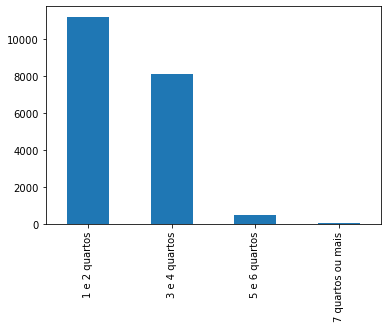

In [15]:
# Imprimindo
quartos.value_counts().plot.bar()